# Scenario 2:
An online fashion retailer wants to develop a machine learning model that can classify
customer reviews into different sentiment categories. The model will take as input a
customer review and output a prediction of the review's sentiment, such as positive,
negative, or neutral. Develop a ML model for aforesaid classification with an example
Dataset.

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Import the data

In [16]:
data = pd.read_csv('/content/drive/MyDrive/DRDO assesment/Womens Clothing E-Commerce Reviews.csv')

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### New column
Make a new column named "sentiment". We will use this column as our target variable to train the mode. Where rating is 4 or 5, sentiment is positive (2), for rating 3 sentiment is neutral (1), and for rating 1 and 2 sentiment is 0 (negative).

In [17]:
data['sentiment'] = np.where(data['Rating'] >= 4, 2, np.where(data['Rating'] == 3, 1, 0))

In [5]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,2
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,2
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,2
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,2


## Data Cleaning

In [18]:
data = data.dropna(subset=['Review Text'])
print(data.shape)

(22641, 12)


## EDA

In [19]:
print("Shape of the dataset:", data.shape) # shape of the dataset

print("Basic Statistics:")  # Basic statistics
print(data.describe())

Shape of the dataset: (22641, 12)
Basic Statistics:
         Unnamed: 0   Clothing ID           Age        Rating  \
count  22641.000000  22641.000000  22641.000000  22641.000000   
mean   11740.849035    919.332362     43.280376      4.183561   
std     6781.957509    202.266874     12.326980      1.115762   
min        0.000000      1.000000     18.000000      1.000000   
25%     5872.000000    861.000000     34.000000      4.000000   
50%    11733.000000    936.000000     41.000000      5.000000   
75%    17621.000000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count     sentiment  
count     22641.000000             22641.000000  22641.000000  
mean          0.818868                 2.630582      1.665960  
std           0.385136                 5.786164      0.657139  
min           0.000000                 0.000000      0.000000  
25%           1.000000                 0.0

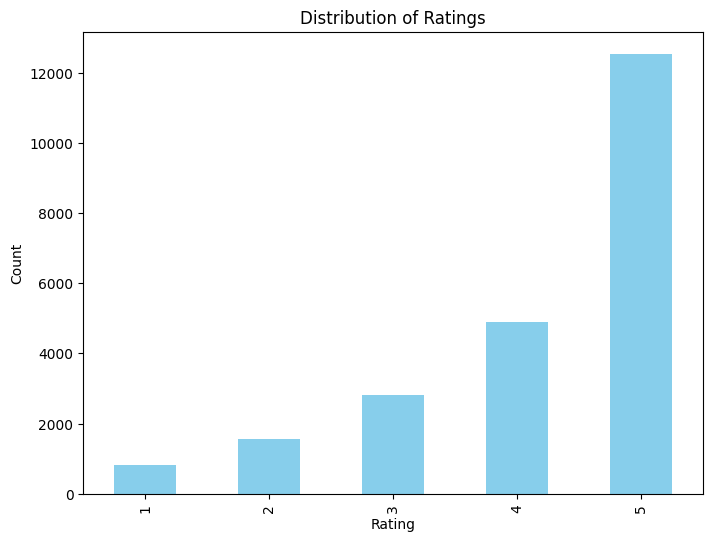

In [20]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
data['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

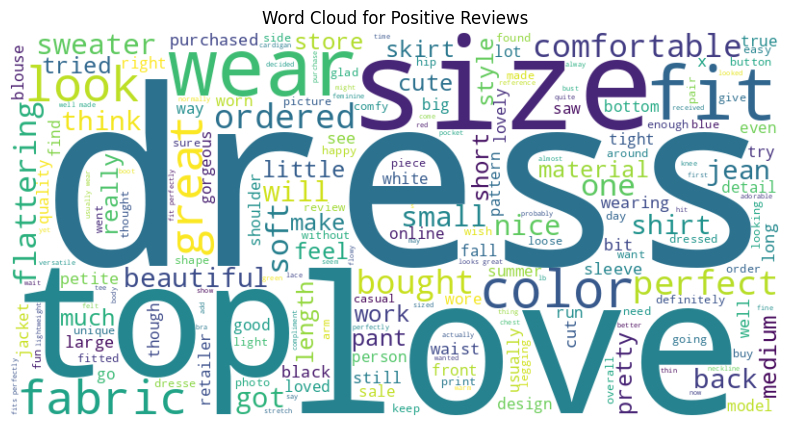

In [21]:
# Word cloud for positive reviews
positive_reviews = " ".join(data[data['sentiment'] == 2]['Review Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [22]:
tokenizer = Tokenizer()  # initialise a tokeniser
tokenizer.fit_on_texts(data['Review Text'])
X = tokenizer.texts_to_sequences(data['Review Text'])  # text to sequence
X = pad_sequences(X)  # pad the sequences for uniform lenght
y = data['sentiment'] # labels

## Train Test Split

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the model

In [36]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 75
max_length = len(X[0])

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=75))
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
255/255 [==============================] - 37s 137ms/step - loss: 0.7626 - accuracy: 0.7903 - val_loss: 0.5234 - val_accuracy: 0.7986
Epoch 2/10
255/255 [==============================] - 38s 148ms/step - loss: 0.4108 - accuracy: 0.8318 - val_loss: 0.4926 - val_accuracy: 0.7975
Epoch 3/10
255/255 [==============================] - 34s 134ms/step - loss: 0.3520 - accuracy: 0.8537 - val_loss: 0.5068 - val_accuracy: 0.7919
Epoch 4/10
255/255 [==============================] - 35s 137ms/step - loss: 0.3149 - accuracy: 0.8684 - val_loss: 0.5346 - val_accuracy: 0.7892
Epoch 5/10
255/255 [==============================] - 34s 132ms/step - loss: 0.2805 - accuracy: 0.8883 - val_loss: 0.5616 - val_accuracy: 0.7809
Epoch 6/10
255/255 [==============================] - 35s 137ms/step - loss: 0.2574 - accuracy: 0.8996 - val_loss: 0.6480 - val_accuracy: 0.7853
Epoch 7/10
255/255 [==============================] - 34s 132ms/step - loss: 0.2300 - accuracy: 0.9146 - val_loss: 0.6677 - val_ac

## Accuracy

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

142/142 [==============================] - 3s 23ms/step - loss: 0.6772 - accuracy: 0.7885
Accuracy: 78.85%


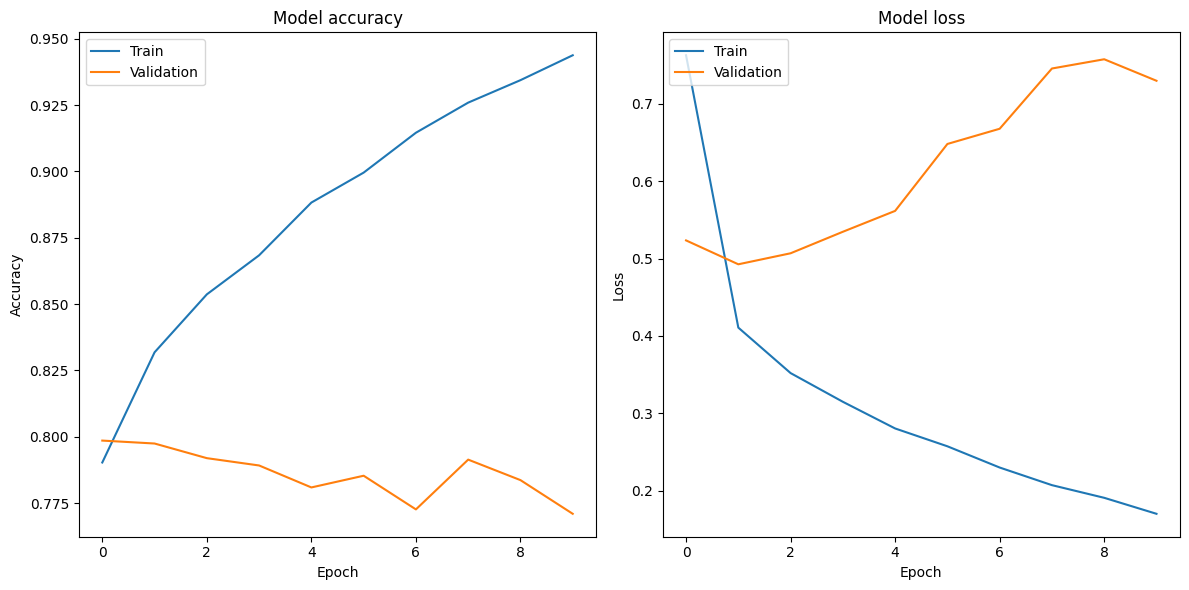

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Saving the model
Here, we will save the model as a pickle file.This file can be used for importing the model when we want to build application, we can do so using Flask.

In [40]:
model.save('sentiment_model.h5')
import pickle
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion:
The model is giving respectable accuracy (78.85%) but as we can see it is overfitting. To reduce the overfitting we can take the following measures:
1. Increase the training data.
2. Reduce the complexity of the model
3. Add a dropout layer.
4. Fine tune the model.

I could not work with the above solutions to make the val accuracy better due to shortage of time, but I plan on working on it eventually and try to increase the performance of the model.